# 实习五-六内容：
    计算1961-2010年夏季三类年雨型合成图；
    计算各类雨型的前期冬季（DJF）高度场距平合成图，指出可能出现的遥相关型。
    计算前期冬季北太平洋海温I和II类雨型合成差值、I和III类合成差值、II和III类合成差值及T检验，确定关键区。

## 实习五

### 数据处理

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from cartopy.io.shapereader import Reader
from cartopy.mpl.patch import geos_to_path
import geopandas as gpd    # 读取地图数据

In [2]:
# shp = gpd.read_file(r'D:\work\python\tests\100000\100000.shp')
# shp = gpd.read_file(r'E:\Work\Python\usedata\horizion\100000\100000.shp')
# shp

In [3]:
# data_rain = pd.read_csv(r"D:\work\python\short_climate\ddi-1961-2010.txt", sep='.', names=[1,2,3,4])
data_rain = pd.read_csv(r"E:\Work\Python\short_climate\exp5-6\ddi-1961-2010.txt", sep='.', names=[1,2,3,4])
year = np.arange(1961,2011,1)
data_rain.index = [year]
data_rain

,1,2,3,4
1961,1,0,0,NaN
1962,0,1,0,NaN
1963,0,1,0,NaN
1964,1,0,0,NaN
1965,0,1,0,NaN
1966,1,0,0,NaN
1967,1,0,0,NaN
1968,0,0,1,NaN
1969,0,0,1,NaN
1970,0,0,1,NaN


In [4]:
first = (data_rain.loc[:,1]==1).values
year_1 = year[first]
second = (data_rain.loc[:,2]==1).values
year_2 = year[second]
third = (data_rain.loc[:,3]==1).values
year_3 = year[third]

In [5]:
# data = xr.open_dataset(r'D:\work\python\short_climate\CN05.1_Pre_1961_2017_month_025x025.nc')['pre']
data = xr.open_dataset(r'E:\Work\Python\short_climate\exp5-6\CN05.1_Pre_1961_2017_month_025x025.nc')['pre']
data = data.loc[data.time.dt.month.isin([6, 7 ,8])].loc['1961':'2010', :, :]
data = data.groupby(data.time.dt.year).mean('time')
data

<xarray.DataArray 'pre' (year: 50, lat: 163, lon: 283)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 69.75 70.0 70.25 70.5 ... 139.5 139.8 140.0 140.2
  * lat      (lat) float64 14.75 15.0 15.25 15.5 15.75 ... 54.5 54.75 55.0 55.25
  * year     (year) int64 1961 1962 1963 1964 1965 ... 2006 2007 2008 2009 2010

### 计算雨型

In [6]:
data_1 = data.loc[data.year.isin([year_1])]
data_2 = data.loc[data.year.isin([year_2])]
data_3 = data.loc[data.year.isin([year_3])]
data_1

<xarray.DataArray 'pre' (year: 18, lat: 163, lon: 283)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 69.75 70.0 70.25 70.5 ... 139.5 139.8 140.0 140.2
  * lat      (lat) float64 14.75 15.0 15.25 15.5 15.75 ... 54.5 54.75 55.0 55.25
  * year     (year) int64 1961 1964 1966 1967 1973 ... 1995 2001 2004 2006 2009

In [7]:
data_1_mean = data_1.mean(dim='year')
data_2_mean = data_2.mean(dim='year')
data_3_mean = data_3.mean(dim='year')
data_1_mean

<xarray.DataArray 'pre' (lat: 163, lon: 283)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 69.75 70.0 70.25 70.5 ... 139.5 139.8 140.0 140.2
  * lat      (lat) float64 14.75 15.0 15.25 15.5 15.75 ... 54.5 54.75 55.0 55.25

In [8]:
data_mean = data.mean(dim='year')

In [9]:
rain_1 = (data_1_mean - data_mean)/data_mean
rain_2 = (data_2_mean - data_mean)/data_mean
rain_3 = (data_3_mean - data_mean)/data_mean
rain_1

<xarray.DataArray 'pre' (lat: 163, lon: 283)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 69.75 70.0 70.25 70.5 ... 139.5 139.8 140.0 140.2
  * lat      (lat) float64 14.75 15.0 15.25 15.5 15.75 ... 54.5 54.75 55.0 55.25

In [10]:
def t_exam_single(all_data, sample_data):
    xbar = sample_data.mean(axis=0)
    miu = all_data.mean(axis=0)
    s = sample_data.std(axis=0)
    t = (xbar - miu)/s * np.sqrt(len(sample_data['year']))
    return t

In [11]:
lon = data['lon'].data
lat = data['lat'].data

In [12]:
rain_1_t = t_exam_single(data, data_1)
rain_2_t = t_exam_single(data, data_2)
rain_3_t = t_exam_single(data, data_3)
rain_1_t.max()

<xarray.DataArray 'pre' ()>
array(6.42370462)

Text(0.5, 1.0, 'Summer Rsin Patten 1 ')

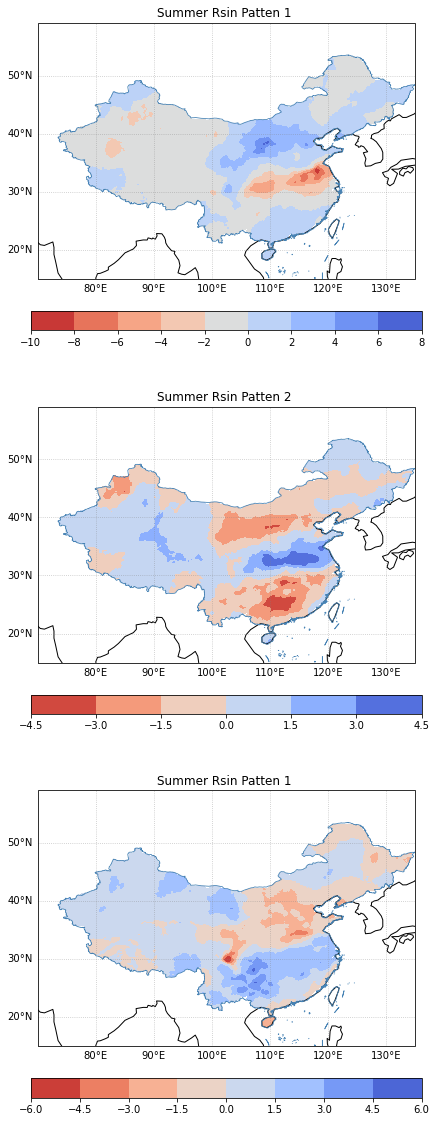

In [13]:
fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=105))
# 海岸线
ax1.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax1.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
ax1.set_extent([70, 135, 15, 55])
shaded = ax1.contourf(lon, lat, rain_1_t, cmap='coolwarm_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
# ax1.add_geometries(Reader(r'D:\work\python\tests\100000\100000.shp').geometries(),
#                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax1.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax1.set_title('Summer Rsin Patten 1 ')

ax2 = fig.add_subplot(3, 1, 2, projection= ccrs.PlateCarree(central_longitude=105))
# 海岸线
ax2.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax2.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
ax2.set_extent([70, 135, 15, 55])
shaded = ax2.contourf(lon, lat, rain_2_t, cmap='coolwarm_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
# ax2.add_geometries(Reader(r'D:\work\python\tests\100000\100000.shp').geometries(),
#                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax2.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax2.set_title('Summer Rsin Patten 2 ')

ax3 = fig.add_subplot(3, 1, 3, projection= ccrs.PlateCarree(central_longitude=105))
# 海岸线
ax3.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax3.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
ax3.set_extent([70, 135, 15, 55])
shaded = ax3.contourf(lon, lat, rain_3_t, cmap='coolwarm_r', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
# ax3.add_geometries(Reader(r'D:\work\python\tests\100000\100000.shp').geometries(),
#                    ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax3.add_geometries(Reader(r'E:\Work\Python\usedata\horizion\100000\100000.shp').geometries(),
                   ccrs.PlateCarree(),facecolor='none', edgecolor='steelblue', linewidth=0.8)
ax3.set_title('Summer Rsin Patten 1 ')

### 计算各类雨型的前期冬季（DJF）高度场距平合成图。

In [14]:
hgt = xr.open_dataset(r'E:\Work\Python\short_climate\exp5-6\hgt.mon.mean.nc')['hgt']
# hgt = xr.open_dataset(r'D:\work\python\short_climate\hgt.mon.mean-1.nc')['hgt']
hgt_500 = hgt.loc[hgt.time.dt.month.isin([12, 1, 2])].loc['1961-03-01':'2011-03-01', 500, :, :]
hgt_500

<xarray.DataArray 'hgt' (time: 150, lat: 73, lon: 144)>
[1576800 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1961-12-01 1962-01-01 ... 2011-02-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [15]:
def pickwin(hgt500):
    hgt_500_win = np.zeros((int(len(hgt_500.time) / 3), len(hgt_500.lat), len(hgt_500.lon)))    # 创建一个空矩阵，均为零，三维空间
    temp = np.zeros((len(hgt_500.lat), len(hgt_500.lon)))    # 创建一个0矩阵，二维空间
    j = 0
    for i in range(len(hgt_500.time)):    # 读入一个时间
        temp += hgt_500[i, :, :]    # 内容相加（求平均要用）
        if (i + 1) % 3 == 0:       # 是三的倍数 
            hgt_500_win[j, :, :] = temp / 3
            j += 1
            temp = 0
# 把win转化成 DataArray
    hgt_500_win = xr.DataArray(data=hgt_500_win, dims=['time', 'lat', 'lon'], 
                               coords={'time': pd.date_range('1961', '2011', freq='1y'), 
                                       'lat': hgt_500.lat.data, 
                                       'lon': hgt_500.lon.data})
    return hgt_500_win
hgt_500_win = pickwin(hgt_500)
hgt_500_win

<xarray.DataArray (time: 50, lat: 73, lon: 144)>
array([[[5024.32682292, 5024.32682292, 5024.32682292, ...,
         5024.32682292, 5024.32682292, 5024.32682292],
        [5019.15332031, 5018.39469401, 5017.66292318, ...,
         5021.3194987 , 5020.63509115, 5019.9280599 ],
        [5024.91097005, 5023.36897786, 5021.88216146, ...,
         5029.11979167, 5027.73079427, 5026.37858073],
        ...,
        [5056.28922526, 5057.43164062, 5058.53076172, ...,
         5053.03157552, 5054.01285807, 5055.10286458],
        [5045.05371094, 5045.36067708, 5045.80110677, ...,
         5043.91829427, 5044.33479818, 5044.69319661],
        [5036.72916667, 5036.72916667, 5036.72916667, ...,
         5036.72916667, 5036.72916667, 5036.72916667]],

       [[5019.65234375, 5019.65234375, 5019.65234375, ...,
         5019.65234375, 5019.65234375, 5019.65234375],
        [5019.30957031, 5018.64306641, 5017.97802734, ...,
         5021.29541016, 5020.63183594, 5019.97802734],
        [5026.91162109, 5025.17578125, 5023.47705078, ...,
         5031.81201172, 5030.25341797, 5028.60693359],
...
        [5154.56835938, 5155.68164062, 5156.57324219, ...,
         5150.61621094, 5151.9921875 , 5153.33398438],
        [5139.70507812, 5140.20751953, 5140.60009766, ...,
         5138.25      , 5138.80908203, 5139.30175781],
        [5132.83837891, 5132.83837891, 5132.83837891, ...,
         5132.83837891, 5132.83837891, 5132.83837891]],

       [[5103.35595703, 5103.35595703, 5103.35595703, ...,
         5103.35595703, 5103.35595703, 5103.35595703],
        [5105.12060547, 5105.27099609, 5105.45556641, ...,
         5104.42822266, 5104.62695312, 5104.89306641],
        [5113.45996094, 5113.625     , 5113.72558594, ...,
         5112.86669922, 5113.13525391, 5113.26757812],
        ...,
        [5155.01318359, 5156.39794922, 5157.72900391, ...,
         5150.24121094, 5151.99755859, 5153.57763672],
        [5144.89990234, 5145.54589844, 5146.22900391, ...,
         5142.82421875, 5143.49511719, 5144.25048828],
        [5137.59716797, 5137.59716797, 5137.59716797, ...,
         5137.59716797, 5137.59716797, 5137.59716797]]])
Coordinates:
  * time     (time) datetime64[ns] 1961-12-31 1962-12-31 ... 2010-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [16]:
hgt_500_win = hgt_500_win - hgt_500_win.mean(dim='time')
hgt_500_win['time'] = np.arange(1961, 2011, 1)
hgt_500_win

<xarray.DataArray (time: 50, lat: 73, lon: 144)>
array([[[-40.73174479, -40.73174479, -40.73174479, ..., -40.73174479,
         -40.73174479, -40.73174479],
        [-42.18901367, -43.13075846, -44.03939779, ..., -39.43592448,
         -40.31583333, -41.21540365],
        [-40.02140951, -41.82791341, -43.54739583, ..., -34.86359049,
         -36.60269857, -38.27060221],
        ...,
        [-56.72031901, -56.78969727, -56.88006836, ..., -56.32494466,
         -56.55827799, -56.68491536],
        [-60.47865234, -60.65603841, -60.71016927, ..., -60.15375326,
         -60.22960286, -60.34937826],
        [-63.43266276, -63.43266276, -63.43266276, ..., -63.43266276,
         -63.43266276, -63.43266276]],

       [[-45.40622396, -45.40622396, -45.40622396, ..., -45.40622396,
         -45.40622396, -45.40622396],
        [-42.03276367, -42.88238607, -43.72429362, ..., -39.46001302,
         -40.31908854, -41.1654362 ],
        [-38.02075846, -40.02111003, -41.95250651, ..., -32.17137044,
         -34.08007487, -36.04224935],
...
        [ 41.5588151 ,  41.46030273,  41.16241211, ...,  41.25969076,
          41.42105143,  41.54620443],
        [ 34.17271484,  34.19080404,  34.08882161, ...,  34.17795247,
          34.24468099,  34.25918294],
        [ 32.67654948,  32.67654948,  32.67654948, ...,  32.67654948,
          32.67654948,  32.67654948]],

       [[ 38.29738932,  38.29738932,  38.29738932, ...,  38.29738932,
          38.29738932,  38.29738932],
        [ 43.77827148,  43.74554362,  43.75324544, ...,  43.67279948,
          43.67602865,  43.74960286],
        [ 48.52758138,  48.42810872,  48.29602865, ...,  48.88331706,
          48.80176107,  48.61839518],
        ...,
        [ 42.00363932,  42.17661133,  42.31817383, ...,  40.88469076,
          41.42642253,  41.78985677],
        [ 39.36753906,  39.52918294,  39.71772786, ...,  38.75217122,
          38.93071615,  39.20791341],
        [ 37.43533854,  37.43533854,  37.43533854, ...,  37.43533854,
          37.43533854,  37.43533854]]])
Coordinates:
  * time     (time) int32 1961 1962 1963 1964 1965 ... 2006 2007 2008 2009 2010
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [17]:
hgt_500_1 = hgt_500_win.loc[hgt_500_win.time.isin(year_1)].mean(dim='time') - hgt_500_win.mean(dim='time')
hgt_500_2 = hgt_500_win.loc[hgt_500_win.time.isin(year_2)].mean(dim='time') - hgt_500_win.mean(dim='time')
hgt_500_3 = hgt_500_win.loc[hgt_500_win.time.isin(year_3)].mean(dim='time') - hgt_500_win.mean(dim='time')
hgt_500_1

<xarray.DataArray (lat: 73, lon: 144)>
array([[ 0.85409324,  0.85409324,  0.85409324, ...,  0.85409324,
         0.85409324,  0.85409324],
       [ 3.3894911 ,  3.2441692 ,  3.09006908, ...,  3.78901946,
         3.65882125,  3.53201027],
       [ 5.11817564,  4.86275137,  4.58567889, ...,  5.86957284,
         5.6169647 ,  5.37328704],
       ...,
       [-5.0669354 , -5.09235026, -5.13939996, ..., -4.97236039,
        -4.99807473, -5.02802337],
       [-4.78879232, -4.81967593, -4.84543222, ..., -4.67513817,
        -4.7185442 , -4.74264359],
       [-4.45378545, -4.45378545, -4.45378545, ..., -4.45378545,
        -4.45378545, -4.45378545]])
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [18]:
lon_hgt = hgt_500_1['lon'].data
lat_hgt = hgt_500_1['lat'].data

Text(0.5, 1.0, 'winter hgt Patten 3 ')

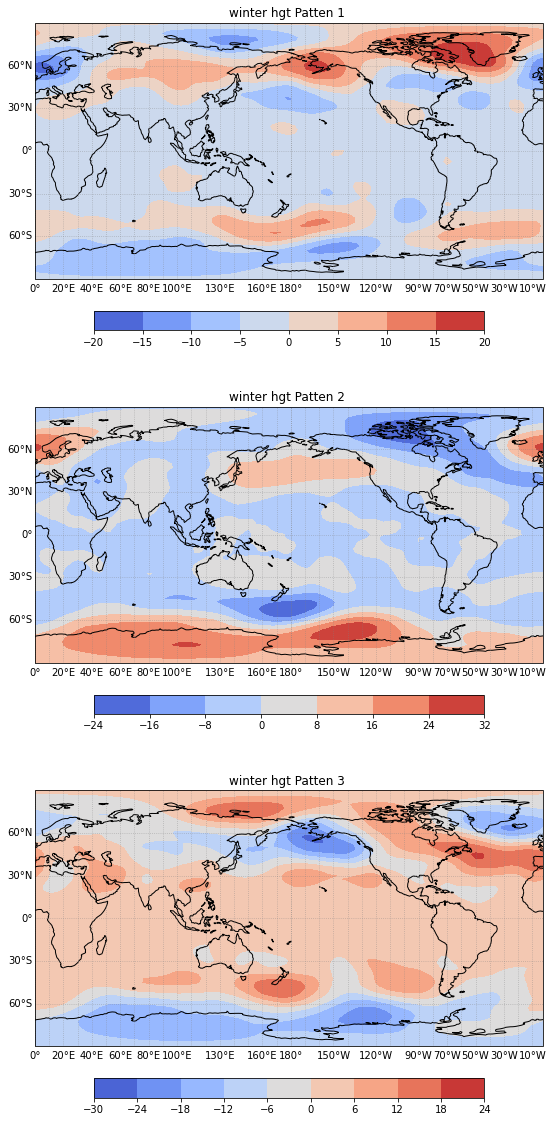

In [19]:
fig1 = plt.figure(figsize=(10, 20))
ax4 = fig1.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax4.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax4.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax4.contourf(lon_hgt.data, lat_hgt.data, hgt_500_1, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax4.set_title('winter hgt Patten 1 ')

ax5 = fig1.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax5.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax5.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax5.contourf(lon_hgt.data, lat_hgt.data, hgt_500_2, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax5.set_title('winter hgt Patten 2 ')

ax6 = fig1.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax6.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax6.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax6.contourf(lon_hgt.data, lat_hgt.data, hgt_500_3, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax6.set_title('winter hgt Patten 3 ')

In [20]:
# t检验两个变量, skipna=True
def t_exam_double(x1, x2, n1, n2):
    x1_ave = x1.mean(axis=0)
    x2_ave = x2.mean(axis=0)
    s1 = x1.std(axis=0)
    s2 = x2.std(axis=0)
    # 计算t
    t = (x1_ave - x2_ave) / (np.sqrt(((n1 - 1) * np.power(s1, 2) + (n2 - 1) * np.power(s2, 2)) / (n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2))
    return t

In [21]:
hgt_500_1_t = t_exam_double(hgt_500_win.loc[hgt_500_win.time.isin(year_1)], hgt_500_win, int(len(year_1)), 50)
hgt_500_2_t = t_exam_double(hgt_500_win.loc[hgt_500_win.time.isin(year_2)], hgt_500_win, int(len(year_2)), 50)
hgt_500_3_t = t_exam_double(hgt_500_win.loc[hgt_500_win.time.isin(year_3)], hgt_500_win, int(len(year_3)), 50)
print(hgt_500_1_t.max(), hgt_500_1_t.min())
hgt_500_1_t

<xarray.DataArray ()>
array(1.37739445) <xarray.DataArray ()>
array(-1.38149535)


<xarray.DataArray (lat: 73, lon: 144)>
array([[ 0.06558912,  0.06558912,  0.06558912, ...,  0.06558912,
         0.06558912,  0.06558912],
       [ 0.26196497,  0.24945086,  0.23620206, ...,  0.29774627,
         0.28597957,  0.27454385],
       [ 0.39023394,  0.36718739,  0.34296195, ...,  0.46027133,
         0.43645131,  0.41366525],
       ...,
       [-0.48618381, -0.48565975, -0.48727573, ..., -0.48709759,
        -0.48617255, -0.48562822],
       [-0.47414978, -0.47574277, -0.47675818, ..., -0.46722272,
        -0.47021625, -0.47100682],
       [-0.44941392, -0.44941392, -0.44941392, ..., -0.44941392,
        -0.44941392, -0.44941392]])
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

Text(0.5, 1.0, 'winter hgt Patten 3 ')

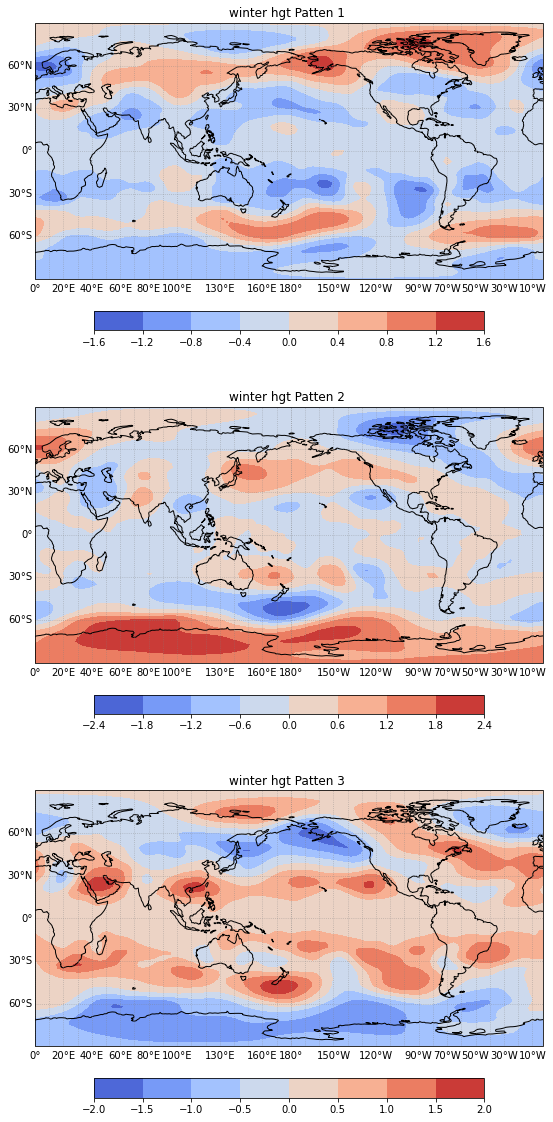

In [22]:
fig1 = plt.figure(figsize=(10, 20))
ax4 = fig1.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax4.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax4.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax4.contourf(lon_hgt.data, lat_hgt.data, hgt_500_1_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax4.set_title('winter hgt Patten 1 ')

ax5 = fig1.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax5.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax5.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax5.contourf(lon_hgt.data, lat_hgt.data, hgt_500_2_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax5.set_title('winter hgt Patten 2 ')

ax6 = fig1.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax6.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax6.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax6.contourf(lon_hgt.data, lat_hgt.data, hgt_500_3_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax6.set_title('winter hgt Patten 3 ')

## 实习六

### 数据处理

In [23]:
# sst = xr.open_dataset(r'D:\work\python\short_climate\sst.mnmean.v4.nc')['sst'].loc['1961-03-01':'2010-03-01', :, :]
sst = xr.open_dataset(r'E:\Work\Python\short_climate\exp5-6\sst.mnmean.v4.nc')['sst'].loc['1961-03-01':'2010-03-01', :, :]
sst = sst.loc[sst.time.dt.month.isin([12,1,2])]
sst = pickwin(sst)
sst['time'] = np.arange(1961, 2011, 1)
sst = sst - sst.mean(dim='time')
sst

<xarray.DataArray (time: 50, lat: 73, lon: 144)>
array([[[-40.73174479, -40.73174479, -40.73174479, ..., -40.73174479,
         -40.73174479, -40.73174479],
        [-42.18901367, -43.13075846, -44.03939779, ..., -39.43592448,
         -40.31583333, -41.21540365],
        [-40.02140951, -41.82791341, -43.54739583, ..., -34.86359049,
         -36.60269857, -38.27060221],
        ...,
        [-56.72031901, -56.78969727, -56.88006836, ..., -56.32494466,
         -56.55827799, -56.68491536],
        [-60.47865234, -60.65603841, -60.71016927, ..., -60.15375326,
         -60.22960286, -60.34937826],
        [-63.43266276, -63.43266276, -63.43266276, ..., -63.43266276,
         -63.43266276, -63.43266276]],

       [[-45.40622396, -45.40622396, -45.40622396, ..., -45.40622396,
         -45.40622396, -45.40622396],
        [-42.03276367, -42.88238607, -43.72429362, ..., -39.46001302,
         -40.31908854, -41.1654362 ],
        [-38.02075846, -40.02111003, -41.95250651, ..., -32.17137044,
         -34.08007487, -36.04224935],
...
        [ 41.5588151 ,  41.46030273,  41.16241211, ...,  41.25969076,
          41.42105143,  41.54620443],
        [ 34.17271484,  34.19080404,  34.08882161, ...,  34.17795247,
          34.24468099,  34.25918294],
        [ 32.67654948,  32.67654948,  32.67654948, ...,  32.67654948,
          32.67654948,  32.67654948]],

       [[ 38.29738932,  38.29738932,  38.29738932, ...,  38.29738932,
          38.29738932,  38.29738932],
        [ 43.77827148,  43.74554362,  43.75324544, ...,  43.67279948,
          43.67602865,  43.74960286],
        [ 48.52758138,  48.42810872,  48.29602865, ...,  48.88331706,
          48.80176107,  48.61839518],
        ...,
        [ 42.00363932,  42.17661133,  42.31817383, ...,  40.88469076,
          41.42642253,  41.78985677],
        [ 39.36753906,  39.52918294,  39.71772786, ...,  38.75217122,
          38.93071615,  39.20791341],
        [ 37.43533854,  37.43533854,  37.43533854, ...,  37.43533854,
          37.43533854,  37.43533854]]])
Coordinates:
  * time     (time) int32 1961 1962 1963 1964 1965 ... 2006 2007 2008 2009 2010
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [24]:
# 筛选北太平洋:0-65n,100e-80w
sst_north = sst.loc[:, 65:-10, 120:260]
sst_north

<xarray.DataArray (time: 50, lat: 31, lon: 57)>
array([[[ 21.66991211,  22.18954427,  22.50155273, ..., -33.17933594,
         -30.70593099, -27.46353841],
        [ 32.41288086,  32.27506185,  31.50762044, ..., -38.12239583,
         -35.30642904, -31.70357422],
        [ 41.01202148,  40.11933919,  38.05098633, ..., -43.62807943,
         -41.37723307, -37.88285482],
        ...,
        [-17.57108073, -17.48304687, -17.32869792, ...,  -6.8653125 ,
          -7.59667969,  -8.10418294],
        [-16.81484701, -16.85369466, -16.6162793 , ...,  -6.18046224,
          -6.67031901,  -7.07135742],
        [-15.26911784, -15.34251953, -15.35383138, ...,  -5.33098307,
          -5.37875326,  -5.52420898]],

       [[  9.16014648,   9.70500651,  11.3306543 , ..., -20.07923828,
         -25.8366276 , -30.77050456],
        [ 24.30545898,  24.04150065,  25.11048503, ..., -23.8610026 ,
         -31.15685221, -37.31783203],
        [ 37.33477539,  36.21927409,  36.3380957 , ..., -23.35399089,
         -31.3783724 , -38.18493815],
...
        [ 19.04545573,  18.99009766,  19.06322917, ...,  16.56339844,
          16.79736328,  17.09373372],
        [ 20.11842122,  20.07469076,  20.18010742, ...,  17.57897786,
          17.91936198,  18.42668945],
        [ 20.15698893,  19.91382812,  19.87484701, ...,  19.29727214,
          19.44806966,  19.88204102]],

       [[ 14.84959961,  15.53166667,  16.18661133, ...,  22.63902344,
          25.1399349 ,  27.73437826],
        [ 11.94266602,  13.85839518,  15.6944694 , ...,  19.4749349 ,
          21.28943685,  23.10599609],
        [  9.26250977,  12.93704753,  16.60616211, ...,  15.04835286,
          16.57133464,  17.82775716],
        ...,
        [-10.87495443, -10.43958984,  -9.69214193, ...,   0.19035156,
           0.74365234,   1.1386556 ],
        [ -9.28148112,  -8.83546549,  -8.29254883, ...,   2.09850911,
           2.45451823,   2.76262695],
        [ -9.18773763,  -8.76732422,  -8.61343424, ...,   4.61953776,
           4.61262044,   4.73262695]]])
Coordinates:
  * time     (time) int32 1961 1962 1963 1964 1965 ... 2006 2007 2008 2009 2010
  * lat      (lat) float32 65.0 62.5 60.0 57.5 55.0 ... 0.0 -2.5 -5.0 -7.5 -10.0
  * lon      (lon) float32 120.0 122.5 125.0 127.5 ... 252.5 255.0 257.5 260.0

In [25]:
year_1_early = list(np.array(year_1) - 1)
year_2_early = list(np.array(year_2) - 1)
year_3_early = list(np.array(year_3) - 1)

### 合成插值

In [26]:
sst_north_12 = sst_north.loc[sst_north.time.isin([year_1_early])].mean(dim='time') - sst_north.loc[sst_north.time.isin([year_2_early])].mean(dim='time')
sst_north_13 = sst_north.loc[sst_north.time.isin([year_1_early])].mean(dim='time') - sst_north.loc[sst_north.time.isin([year_3_early])].mean(dim='time')
sst_north_23 = sst_north.loc[sst_north.time.isin([year_2_early])].mean(dim='time') - sst_north.loc[sst_north.time.isin([year_3_early])].mean(dim='time')
sst_north_23

<xarray.DataArray (lat: 31, lon: 57)>
array([[ 12.68635685,  13.49825942,  14.21529756, ..., -43.39925513,
        -44.37527574, -44.70306373],
       [ 12.3159735 ,  12.98340035,  13.47921837, ..., -44.2466816 ,
        -45.9318953 , -46.83572495],
       [ 11.72513404,  12.28624962,  12.59203048, ..., -43.06726601,
        -45.54381319, -47.24545803],
       ...,
       [ -6.12432981,  -6.07199755,  -5.9623066 , ...,  -5.4097752 ,
         -5.38364737,  -5.32852137],
       [ -5.6130936 ,  -5.56191023,  -5.45538833, ...,  -5.14297832,
         -5.08717831,  -5.04552122],
       [ -5.0010972 ,  -5.01548139,  -4.98316674, ...,  -5.10444049,
         -4.99554036,  -4.88864124]])
Coordinates:
  * lat      (lat) float32 65.0 62.5 60.0 57.5 55.0 ... 0.0 -2.5 -5.0 -7.5 -10.0
  * lon      (lon) float32 120.0 122.5 125.0 127.5 ... 252.5 255.0 257.5 260.0

In [27]:
lon_n = sst_north['lon'].data
lat_n = sst_north['lat'].data

Text(0.5, 1.0, 'winter hgt Patten 1 ')

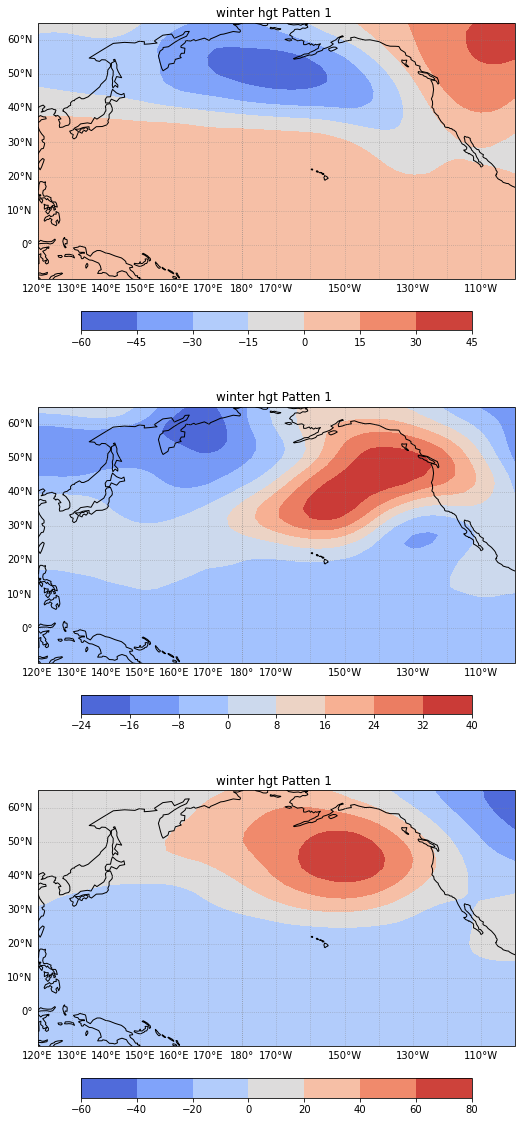

In [28]:
fig = plt.figure(figsize=(10, 20))
ax7 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax7.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax7.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax7.contourf(lon_n, lat_n, sst_north_12, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax7.set_title('winter hgt Patten 1 ')

ax8 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax8.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax8.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax8.contourf(lon_n, lat_n, sst_north_13, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax8.set_title('winter hgt Patten 1 ')

ax9 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax9.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax9.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax9.contourf(lon_n, lat_n, sst_north_23, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax9.set_title('winter hgt Patten 1 ')

In [29]:
sst_north_12_t = t_exam_double(sst_north.loc[sst_north.time.isin([year_1_early])], sst_north.loc[sst_north.time.isin([year_2_early])], len(year_1_early), len(year_2_early))
sst_north_13_t = t_exam_double(sst_north.loc[sst_north.time.isin([year_1_early])], sst_north.loc[sst_north.time.isin([year_3_early])], len(year_1_early), len(year_3_early))
sst_north_23_t = t_exam_double(sst_north.loc[sst_north.time.isin([year_2_early])], sst_north.loc[sst_north.time.isin([year_3_early])], len(year_2_early), len(year_3_early))

Text(0.5, 1.0, 'winter hgt Patten 1 ')

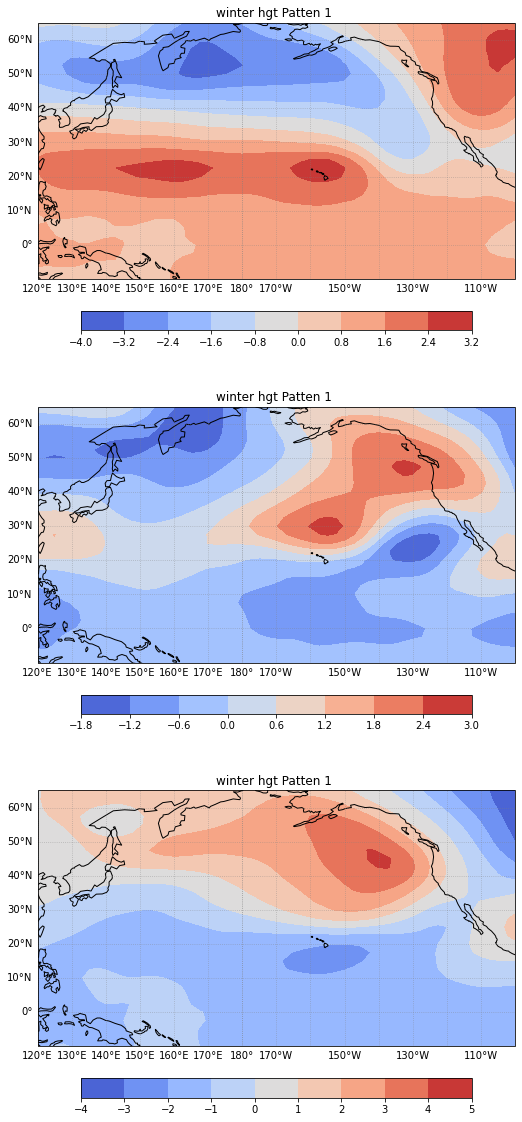

In [30]:
fig = plt.figure(figsize=(10, 20))
ax10 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax10.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax10.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
               linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax10.contourf(lon_n, lat_n, sst_north_12_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax10.set_title('winter hgt Patten 1 ')

ax11 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax11.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax11.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
               linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax11.contourf(lon_n, lat_n, sst_north_13_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax11.set_title('winter hgt Patten 1 ')

ax12 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax12.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax12.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax12.contourf(lon_n, lat_n, sst_north_23_t, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax12.set_title('winter hgt Patten 1 ')